### NN1
Tymoteusz Urban

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
class NeuralNetwork:
    
    def __init__(self, layers, weights=None, biases=None, activations=None):
        self.layers = layers
        self.num_layers = len(layers)
        
        if weights is None:
            self.weights = [np.random.randn(layers[i-1], layers[i]) for i in range(1, self.num_layers)]
        else:
            self.weights = weights
        
        if biases is None:
            self.biases = [np.random.randn(layers[i]) for i in range(1, self.num_layers)]
        else:
            self.biases = biases
        
        if activations is None:
            self.activations = ['sigmoid' for i in range(1, self.num_layers - 1)] + ['linear']
        else:
            self.activations = activations
        
        activation_functions = {
            'sigmoid': self._sigmoid,
            'linear': self._linear
        }
        self.activation_funcs = list(map(lambda x: activation_functions.get(x), self.activations))

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _linear(self, z):
        return z
    
    def feedforward(self, a):
        for w, b, func in zip(self.weights, self.biases, self.activation_funcs):
            z = np.dot(a, w) + b
            a = func(z)
        return a
    
    def predict(self, df):
        if isinstance(df, pd.Series):
            return df.apply(lambda x: self.feedforward(np.array([x]))[0])
        else:
            return self.feedforward(np.array([df]), print_values=True)

Wytestowanie czy różne architektury działają i nie wyrzucają błędów:

1*5

In [11]:
weights_1 = [np.random.randn(1, 5), np.random.randn(5, 1)]
biases_1 = [np.random.randn(5), np.random.randn(1)] 
activations_1 = ['sigmoid', 'linear']

In [12]:
nn_1 = NeuralNetwork([1, 5, 1], weights=weights_1, biases=biases_1, activations=activations_1)

In [13]:
nn_1.feedforward(np.array([1]))

array([-0.91081111])

1*10

In [14]:
weights_2 = [np.random.randn(1, 10), np.random.randn(10, 1)]
biases_2 = [np.random.randn(10), np.random.randn(1)] 
activations_2 = ['sigmoid', 'linear']

In [15]:
nn_2 = NeuralNetwork([1, 10, 1], weights=weights_2, biases=biases_2, activations=activations_2)

In [16]:
nn_2.feedforward(np.array([1]))

array([-1.06827247])

2*5

In [17]:
weights_3 = [np.random.randn(1, 5), np.random.randn(5, 5), np.random.randn(5, 1)]
biases_3 = [np.random.randn(5), np.random.randn(5), np.random.randn(1)] 
activations_3 = ['sigmoid', 'sigmoid', 'linear']

In [18]:
nn_3 = NeuralNetwork([1, 5, 5, 1], weights=weights_3, biases=biases_3, activations=activations_3)

In [19]:
nn_3.feedforward([1])

array([0.88932465])

### Dane

In [20]:
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [21]:
square_simple = pd.read_csv("dane/regression/square-simple-test.csv", index_col=0)
steps_large = pd.read_csv("dane/regression/steps-large-test.csv", index_col=0)

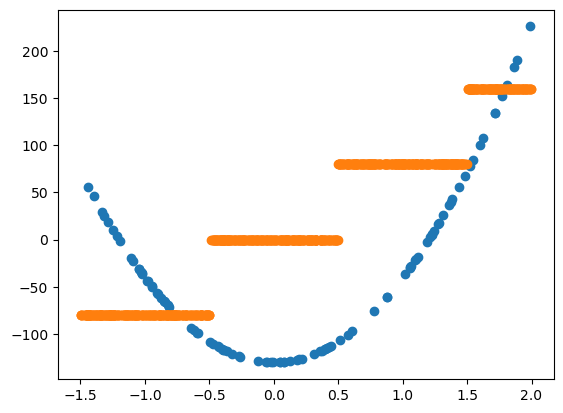

In [5]:
plt.scatter(square_simple['x'], square_simple['y'])
plt.scatter(steps_large['x'], steps_large['y'])
plt.show()

In [22]:
for network in [nn_1, nn_2, nn_3]:
    for dataset in [square_simple, steps_large]:
        y_pred = network.predict(dataset['x'])
        print(MSE(dataset['y'], y_pred))

8681.155918147442
7534.894693673769
8451.129650201681
7377.7348963882805
8772.869082608728
7422.59308915757


Wszystko działa jak powinno, możemy przejść do dobierania wag

## Ustawianie wag

#### square_simple dataset

1 warstwa 5 neuronów

Wagi zostały otrzymane przy pomocy (wiedzy a priori np. że drugi wektor wag powinien być duży) oraz eksperymentów: najpierw względne dopasowywanie na wykresie funkcji, a potem ręcznie zmienianie wag tak, by zminimalizować MSE.

In [153]:
weights = [np.array([[ -8.9,  -4.6,  0,  -3.8, -10.5]]),
 np.array([[ -100],
        [-143.5],
        [ 239],
        [ 222],
        [-133]])]
biases = [np.array([12.5,  4. ,  6, -4.1, 19.2]), np.array([5])]

In [154]:
nn = NeuralNetwork([1, 5, 1], weights=weights, biases=biases)
y_pred1 = nn.predict(square_simple['x'])
MSE(square_simple['y'], y_pred1)

7.659493617860555

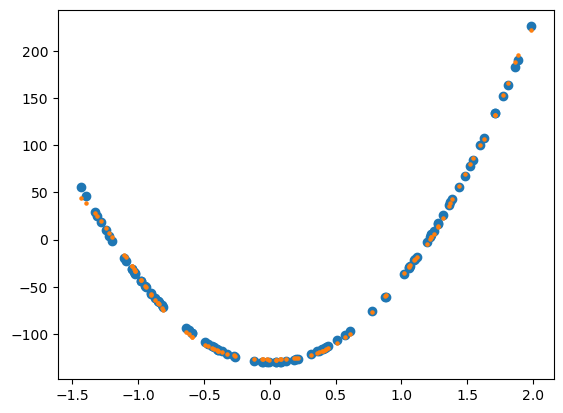

In [77]:
plt.scatter(square_simple['x'], square_simple['y'])
plt.scatter(square_simple['x'], y_pred1, s=5)

1 warstwa 10 neuronów

Można zauważyć, że gdy udało nam się dostać MSE < 9 dla warstwy z 5 neuronami, to możemy tych wag użyć dla architektury z 10 neuronami, a pozostałe ustawić na 0. Wtedy te dodatkowe neurony nie będą jakkolwiek wpływać na wyniki, i otrzymamy bliźniaczą sieć do tej z 5 warstwami

In [156]:
weights = [np.array([[ -8.9,  -4.6,  0,  -3.8, -10.5, 0, 0, 0, 0, 0]]),
 np.array([[ -100],
        [-143.5],
        [ 239],
        [ 222],
        [-133],
          [0],
          [0],
          [0],
          [0],
          [0]])]
biases = [np.array([12.5,  4. ,  6, -4.1, 19.2, 0, 0, 0, 0, 0]), np.array([5])]

In [157]:
nn = NeuralNetwork([1, 10, 1], weights=weights, biases=biases)
y_pred2 = nn.predict(square_simple['x'])
MSE(square_simple['y'], y_pred2)

7.659493617860544

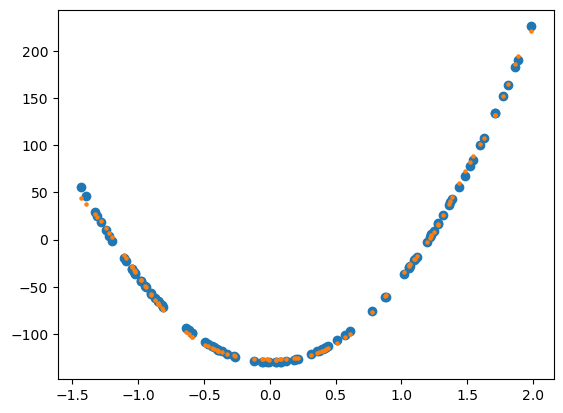

In [158]:
plt.scatter(square_simple['x'], square_simple['y'])
plt.scatter(square_simple['x'], y_pred2, s=5)

2 warstwy po 5 neuronów

In [81]:
weights = [np.array([[ 2.5277771 , -1.874371  , -0.85394995, -0.85044506, -5.03857015]]),
 np.array([[-11.58778723, -11.12499261,  16.51432964, -18.8166609 ,
         -14.87307371],
        [ 10.54953919,   7.32083182, -21.25470409,  16.93736516,
          14.82365477],
        [  4.68280204,   4.67222443,  12.12847252,   8.79608198,
           3.99375672],
        [  3.74439149,   2.61788153,  16.59519591,   6.46896227,
           6.06413009],
        [  4.80636171,   5.15655424,  10.29237644,   5.48604562,
           6.46332653]]),
 np.array([[-28.45116632],
        [-26.18790667],
        [219.49988475],
        [-41.48862776],
        [-36.05547913]])]
biases = [np.array([-0.14225067,  4.45839245, -0.93463341, -1.81741615, -0.81901026]),
 np.array([-1.20964874, -0.58561357, -0.78237998,  0.60735939, -0.98472891]),
 np.array([1.61393835])]

In [82]:
nn = NeuralNetwork([1, 5, 5, 1], weights=weights, biases=biases)
y_pred3 = nn.predict(square_simple['x'])
MSE(square_simple['y'], y_pred3)

7.957378616823682

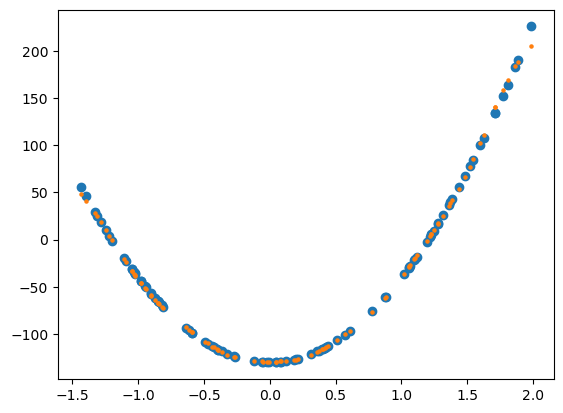

In [83]:
plt.scatter(square_simple['x'], square_simple['y'])
plt.scatter(square_simple['x'], y_pred3, s=5)
plt.show()

#### steps_large dataset

1 warstwa 5 neuronów

In [23]:
# nowe wagi
weights = [np.array([[90.20561232, 88.47259145, 40.57836537,  0.40024377, 13.09889131]]), np.array([[ 82.20662463],
       [ 82.02871926],
       [115.71282616],
       [-86.80079642],
       [-37.43962806]])]
biases = [np.array([-44.79967385,  43.4514774 , -60.61225423,   3.07027512,
       -19.72286957]), np.array([0.81794336])]

In [24]:
nn = NeuralNetwork([1, 5, 1], weights=weights, biases=biases)
y_pred4 = nn.predict(steps_large['x'])
MSE(steps_large['y'], y_pred4)

23.0897964746253

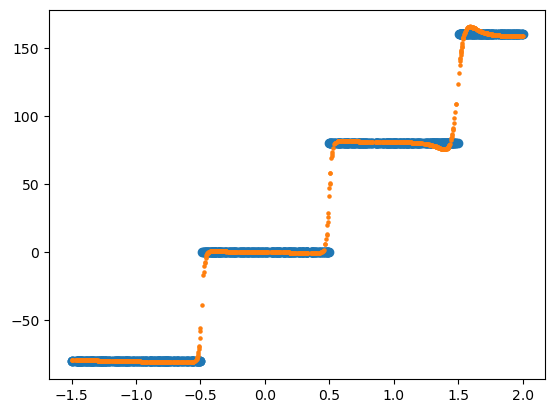

In [25]:
plt.scatter(steps_large['x'], steps_large['y'])
plt.scatter(steps_large['x'], y_pred4, s=5)

1 warstwa 10 neuronów

In [42]:
# nowe wagi:
weights = [np.array([[ 59.84945643, -60.38693972,  16.41401521,  28.18702789,
         58.81308855,  61.7699252 , -28.60149239,  61.75053536,
        -56.93791512,  57.97013632]]), np.array([[ -69.99614201],
       [ -69.63517256],
       [-110.31905786],
       [ 102.8609668 ],
       [  47.2780337 ],
       [  80.68766256],
       [ -84.33800145],
       [  80.47651883],
       [  80.77069351],
       [  33.81193926]])]
biases = [np.array([-27.42018337,  29.25488331, -24.57718061, -42.08837979,
       -28.4247261 ,  31.06034746,  42.70865137,  31.05145369,
       -29.68925833, -27.97675392]), np.array([-6.67432156])]

In [43]:
nn = NeuralNetwork([1, 10, 1], weights=weights, biases=biases)
y_pred5 = nn.predict(steps_large['x'])
MSE(steps_large['y'], y_pred5)

28.24373582072286

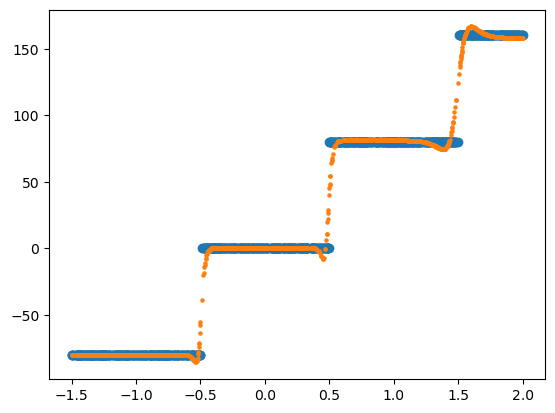

In [44]:
plt.scatter(steps_large['x'], steps_large['y'])
plt.scatter(steps_large['x'], y_pred5, s=5)

2 warstwy po 5 neuronów

In [45]:
weights = [np.array([[ 8.3519067 , -3.43774517, -4.56134835, -3.22323689,  6.7293494 ]]),
 np.array([[ -5.30915403, 128.73441887,  44.51136448,  47.14581314,
          65.61996331],
        [111.51829378, -10.4406453 , -57.38709398, -61.81231708,
          -5.06917834],
        [130.66422621,  -0.75022535, -32.31133572, -36.19534409,
           1.90430267],
        [ 76.55964897, -38.29115624, -54.5026081 , -59.12963333,
         -21.18537695],
        [-40.40208778,  52.81485201,  96.28066172, 109.90789681,
          34.99162828]]),
 np.array([[-80.9403863 ],
        [ 80.75459835],
        [ 31.05064383],
        [ 48.83578297],
        [ -1.01992552]])]
biases = [np.array([ 3.60266617,  3.2310535 ,  5.59830487,  1.71100552, -2.68950954]),
 np.array([-0.42605736,  0.15281038, -0.90381384, -2.7355437 , -0.82934771]),
 np.array([1.11947024])]

In [46]:
nn = NeuralNetwork([1, 5, 5, 1], weights=weights, biases=biases)
y_pred6 = nn.predict(steps_large['x'])
MSE(steps_large['y'], y_pred6)

7.089726070901314

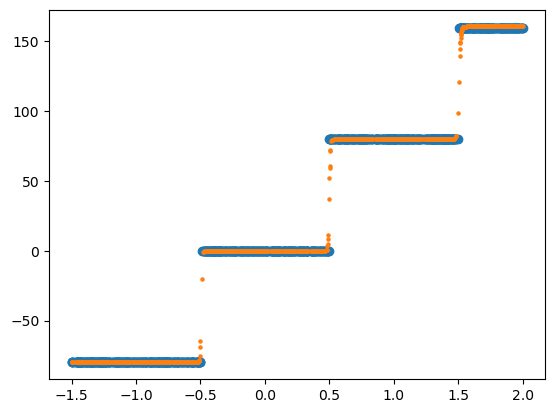

In [47]:
plt.scatter(steps_large['x'], steps_large['y'])
plt.scatter(steps_large['x'], y_pred6, s=5)
# plt.scatter(steps_large['x'], n10.predict(square_simple['x']), s=10)